In [1]:
import os
from vp_analysis_api.VPAnalysisAPI import VPAnalysisAPI

# download api key file from https://portal.variantperception.com/user/settings?tab=api%20keys
# save the value in your local user directory (C:/Users/John/vp_api_key.txt)
# or set the key as an environment variable: VP_ANALYSIS_API_KEY 
if "VP_ANALYSIS_API_KEY" in os.environ:
    print("Reading API key from environment")
    api_key = os.environ.get("VP_ANALYSIS_API_KEY")
else:
    with open(os.path.expanduser('~/vp_api_key.txt'), 'r') as file:
        print("Reading API key from file")
        api_key = file.read().replace('\n', '')
print(f"API Key: {api_key[:5]}...")
api = VPAnalysisAPI(api_key)


Reading API key from environment


'eyJhb'

In [2]:
# Get list of single stock codes
api.get_securities()

,stock_code,company_name,security_name,country,industry,exchange_name,traded_currency
0,A1LK34:BOVESPA,"Alaska Air Group, Inc.",BDR EACH 1 REPR 1 COM,United States,Passenger Airlines,Bolsa de Valores de Sao Paulo,BRL
1,WUNI34:BOVESPA,The Western Union Company,BDR REPR 1 COM SHARE USD0.01,United States,Financial Services,Bolsa de Valores de Sao Paulo,BRL
2,I1VZ34:BOVESPA,Invesco Ltd.,BDR EACH REPR 1 COM,United States,Capital Markets,Bolsa de Valores de Sao Paulo,BRL
3,L1KQ34:BOVESPA,LKQ Corporation,BDR EACH 1 REPR 1 SHS UNSPON,United States,Distributors,Bolsa de Valores de Sao Paulo,BRL
4,B1WA34:BOVESPA,BorgWarner Inc.,BDR EACH 1 REPR 1 SHS UNSPON,United States,Automobile Components,Bolsa de Valores de Sao Paulo,BRL
...,...,...,...,...,...,...,...
18834,GEV:NYSE,GE Vernova Inc.,Share Capital,United States,Electrical Equipment,New York Stock Exchange,USD
18835,SVITZR:CPSE,Svitzer Group A/S,Share Capital,Denmark,Transportation Infrastructure,OMX Nordic Exchange Copenhagen,DKK
18836,WBC:JSE,We Buy Cars Holdings Limited,Share Capital,South Africa,Specialty Retail,The Johannesburg Securities Exchange,ZAR
18837,WILL:SWX,"Will Semiconductor Co., Ltd.",Gdr,China,Semiconductors and Semiconductor Equipment,SIX Swiss Exchange,USD


In [14]:
# Get list of factors
api.get_factors()

,factor_id,name
0,vp_equity_duration,VP Equity Duration
1,vp_shenanigan_score,VP Shenanigan Score
2,vp_crowding_score,VP Crowding Score
3,vp_fast_money_usd,VP Fast Money (USD Denominated)
4,capital_cycle_score,Capital Cycle Score


In [17]:
# Fetch data
data = api.get_security_factors(['AAPL:NasdaqGS'], ['vp_crowding_score', 'capital_cycle_score'])
data = api.clean_df(data)
data

stock_code            AAPL:NasdaqGS                    
factor_identifier vp_crowding_score capital_cycle_score
dt                                                     
1997-01-02                      NaN           -0.043847
1997-01-03                      NaN           -0.043669
1997-01-06                      NaN           -0.044392
1997-01-07                      NaN           -0.044528
1997-01-08                      NaN           -0.044977
...                             ...                 ...
2024-05-23                 4.128751            0.062890
2024-05-24                 4.154086            0.063267
2024-05-27                 4.154086                 NaN
2024-05-28                 4.181650                 NaN
2024-05-29                 4.239508                 NaN

[7150 rows x 2 columns]

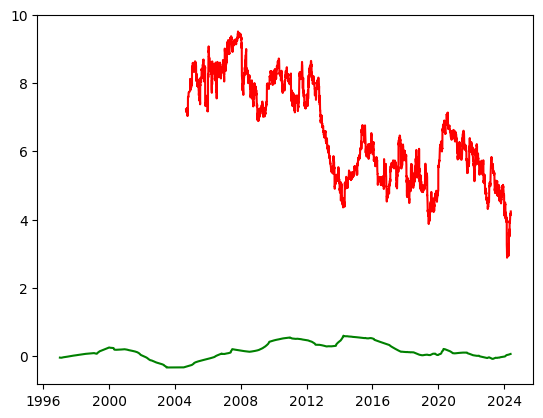

In [18]:
import matplotlib.pyplot as plt
plt.plot(data[('AAPL:NasdaqGS', 'vp_crowding_score')], color='red')
plt.plot(data[('AAPL:NasdaqGS', 'capital_cycle_score')], color='green')